Cotton

In [11]:
pip install tensorflow


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
#importing all libraries

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

In [13]:
#Importing data-set

train_data_dir = "D:/Cotton Disease/train"
test_data_dir = "D:/Cotton Disease/test"
print(train_data_dir)

D:/Cotton Disease/train


In [14]:
print("Train data",len(train_data_dir))
print("Test data",len(test_data_dir))

Train data 23
Test data 22


In [15]:
#image preprocessing
# Set image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Create image data generators with preprocessing
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Load and preprocess the training dataset
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Load and preprocess the test dataset
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 715 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


In [16]:
# Create a sequential model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',   #adam model
              metrics=['accuracy'])


Epoch 1/20
22/22 [==============================] - 22s 927ms/step - loss: 0.7036 - accuracy: 0.5994
Epoch 2/20
22/22 [==============================] - 23s 1s/step - loss: 0.5147 - accuracy: 0.7731
Epoch 3/20
22/22 [==============================] - 23s 1s/step - loss: 0.4307 - accuracy: 0.8097
Epoch 4/20
22/22 [==============================] - 23s 1s/step - loss: 0.3261 - accuracy: 0.8653
Epoch 5/20
22/22 [==============================] - 23s 1s/step - loss: 0.2626 - accuracy: 0.8946
Epoch 6/20
22/22 [==============================] - 23s 1s/step - loss: 0.1912 - accuracy: 0.9341
Epoch 7/20
22/22 [==============================] - 23s 1s/step - loss: 0.1455 - accuracy: 0.9531
Epoch 8/20
22/22 [==============================] - 30s 1s/step - loss: 0.1223 - accuracy: 0.9605
Epoch 9/20
22/22 [==============================] - 26s 1s/step - loss: 0.0919 - accuracy: 0.9707
Epoch 10/20
22/22 [==============================] - 23s 1s/step - loss: 0.0791 - accuracy: 0.9707
Epoch 11/20
22/2

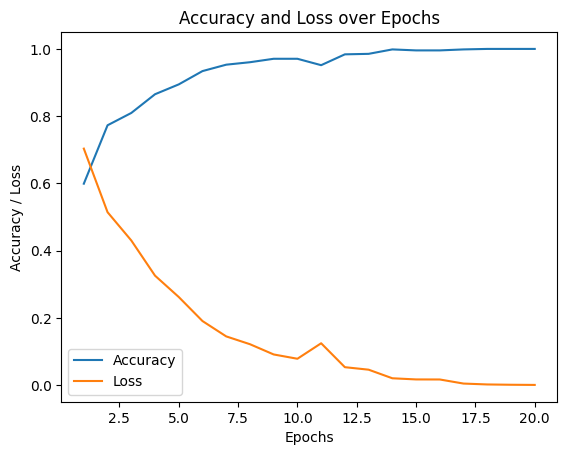

In [17]:
epochs = 20

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs)

# Get the accuracy and loss values from the history
accuracy = history.history['accuracy']
loss = history.history['loss']
import matplotlib.pyplot as plt


# Plot accuracy and loss on the same graph
plt.plot(range(1, epochs+1), accuracy, label='Accuracy')
plt.plot(range(1, epochs+1), loss, label='Loss')
plt.title('Accuracy and Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()


In [18]:
model_file = 'D:/model_fileapple_20new1epoch.h5'

# Save the trained model
model.save(model_file)

from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model(model_file)

In [19]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Load the saved model
model = keras.models.load_model("D:/model_fileapple_20new1epoch.h5")

# Make predictions on all images in a directory
def predict_leaf_for_directory(directory_path):
    rot=1
    healthy=1
    for filename in os.listdir(directory_path):
        if filename.endswith(".jpg.jpeg") or filename.endswith(".jpg") or filename.endswith(".JPG"):
            image_path = os.path.join(directory_path, filename)
            print(image_path)
            image = keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
            input_arr = keras.preprocessing.image.img_to_array(image)
            input_arr = np.array([input_arr])  # Convert single image to a batch
            input_arr = input_arr / 255.0  # Normalize pixel values
            predictions = model.predict(input_arr)

            if predictions[0] > 0.005:
                label = "Healthy Leaf"
                print(label , predictions)
                healthy = healthy + 1
            else:
                label = "Rot Leaf"
                print(label , predictions)
                rot = rot + 1
    print("rot count " , rot-1)
    print("Healthy count",healthy-1)

# Example usage:
directory_path = 'D:/Cotton Disease/val/fresh cotton leaf'
predict_leaf_for_directory(directory_path)

D:/Cotton Disease/val/fresh cotton leaf\d (106)_iaip.jpg
1/1 [==============================] - 0s 315ms/step
Healthy Leaf [[0.99814093]]
D:/Cotton Disease/val/fresh cotton leaf\d (11)_iaip.jpg
1/1 [==============================] - 0s 62ms/step
Healthy Leaf [[0.99999964]]
D:/Cotton Disease/val/fresh cotton leaf\d (112)_iaip.jpg
1/1 [==============================] - 0s 52ms/step
Healthy Leaf [[1.]]
D:/Cotton Disease/val/fresh cotton leaf\d (117)_iaip.jpg
1/1 [==============================] - 0s 59ms/step
Healthy Leaf [[0.9999653]]
D:/Cotton Disease/val/fresh cotton leaf\d (119)_iaip.jpg
1/1 [==============================] - 0s 54ms/step
Healthy Leaf [[0.99999905]]
D:/Cotton Disease/val/fresh cotton leaf\d (139)_iaip.jpg
1/1 [==============================] - 0s 37ms/step
Healthy Leaf [[1.]]
D:/Cotton Disease/val/fresh cotton leaf\d (143)_iaip.jpg
1/1 [==============================] - 0s 40ms/step
Healthy Leaf [[0.9793688]]
D:/Cotton Disease/val/fresh cotton leaf\d (144)_iaip.jpg
1/

Found 51 images belonging to 2 classes.


2/2 [==============================] - 1s 459ms/step
['Accuracy', 'Precision', 'Recall', 'F1-score']
[0.7078431372549019, 0.7153846153846154, 0.7153846153846154, 0.7153846153846154]


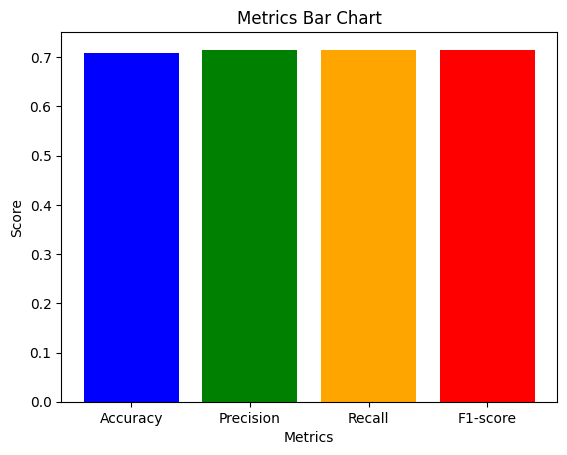

In [26]:
# Load and preprocess the test dataset
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

predicted_probs = model.predict(test_generator)
predicted_labels = (predicted_probs > 0.5).astype(int).flatten()

true_labels = test_generator.classes
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]
print(metrics)
print(values)
colors = ['blue', 'green', 'orange', 'red']

# Plot the bar chart
plt.bar(metrics, values, color=colors)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Metrics Bar Chart')
plt.show()

Found 715 images belonging to 2 classes.


23/23 [==============================] - 5s 231ms/step
['Accuracy', 'Precision', 'Recall', 'F1-score']
[0.6216783216783217, 0.6995316159250585, 0.6995316159250585, 0.5995316159250585]


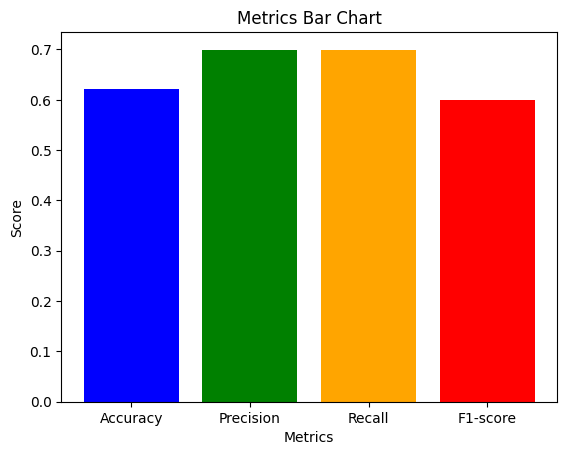

In [27]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

predicted_probs = model.predict(train_generator)
predicted_labels = (predicted_probs > 0.5).astype(int).flatten()

true_labels = train_generator.classes
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]
print(metrics)
print(values)
colors = ['blue', 'green', 'orange', 'red']

# Plot the bar chart
plt.bar(metrics, values, color=colors)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Metrics Bar Chart')
plt.show()

Epoch 1/10
22/22 [==============================] - 21s 906ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0238 - val_accuracy: 1.0000
Epoch 2/10
22/22 [==============================] - 25s 1s/step - loss: 9.0754e-04 - accuracy: 1.0000 - val_loss: 0.0242 - val_accuracy: 1.0000
Epoch 3/10
22/22 [==============================] - 23s 1s/step - loss: 7.3761e-04 - accuracy: 1.0000 - val_loss: 0.0299 - val_accuracy: 0.9804
Epoch 4/10
22/22 [==============================] - 22s 983ms/step - loss: 7.7647e-04 - accuracy: 1.0000 - val_loss: 0.0204 - val_accuracy: 1.0000
Epoch 5/10
22/22 [==============================] - 24s 1s/step - loss: 5.8692e-04 - accuracy: 1.0000 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 6/10
22/22 [==============================] - 23s 1s/step - loss: 5.7655e-04 - accuracy: 1.0000 - val_loss: 0.0212 - val_accuracy: 1.0000
Epoch 7/10
22/22 [==============================] - 26s 1s/step - loss: 4.7702e-04 - accuracy: 1.0000 - val_loss: 0.0257 - val_accurac

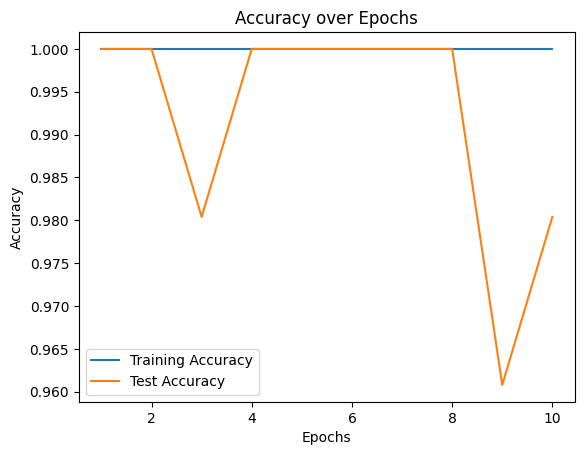

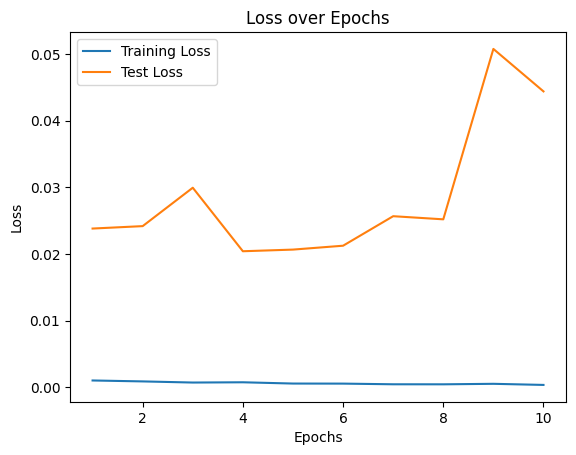

In [28]:
import matplotlib.pyplot as plt
import numpy as np

epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator)  


train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']  

train_loss = history.history['loss']
test_loss = history.history['val_loss']  


plt.plot(range(1, epochs + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs + 1), test_accuracy, label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(range(1, epochs + 1), train_loss, label='Training Loss')
plt.plot(range(1, epochs + 1), test_loss, label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Apple

In [29]:
#Importing data-set

train_data_dir = "D:/vishwash/4th sem/Apple_ML_model/train"
test_data_dir = "D:/vishwash/4th sem/Apple_ML_model/test"
print(train_data_dir)

D:/vishwash/4th sem/Apple_ML_model/train


In [30]:
print("Train data",len(train_data_dir))
print("Test data",len(test_data_dir))

Train data 40
Test data 39


In [32]:
#image preprocessing
# Set image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Create image data generators with preprocessing
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Load and preprocess the training dataset
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Load and preprocess the test dataset
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 807 images belonging to 2 classes.
Found 263 images belonging to 2 classes.


In [33]:
# Create a sequential model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',   #adam model
              metrics=['accuracy'])


Epoch 1/15
25/25 [==============================] - 29s 1s/step - loss: 0.4843 - accuracy: 0.7535
Epoch 2/15
25/25 [==============================] - 20s 803ms/step - loss: 0.2222 - accuracy: 0.9187
Epoch 3/15
25/25 [==============================] - 23s 914ms/step - loss: 0.2256 - accuracy: 0.9058
Epoch 4/15
25/25 [==============================] - 21s 854ms/step - loss: 0.1864 - accuracy: 0.9342
Epoch 5/15
25/25 [==============================] - 21s 826ms/step - loss: 0.1377 - accuracy: 0.9550
Epoch 6/15
25/25 [==============================] - 19s 746ms/step - loss: 0.1486 - accuracy: 0.9432
Epoch 7/15
25/25 [==============================] - 22s 885ms/step - loss: 0.1112 - accuracy: 0.9626
Epoch 8/15
25/25 [==============================] - 18s 700ms/step - loss: 0.1113 - accuracy: 0.9587
Epoch 9/15
25/25 [==============================] - 20s 803ms/step - loss: 0.1116 - accuracy: 0.9561
Epoch 10/15
25/25 [==============================] - 22s 885ms/step - loss: 0.1002 - accuracy:

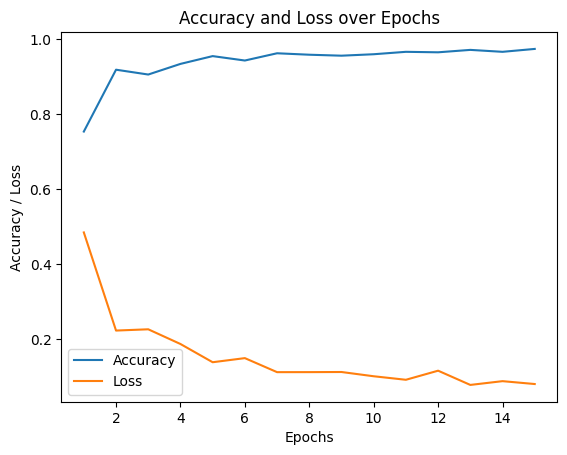

In [34]:
epochs = 15

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs)

# Get the accuracy and loss values from the history
accuracy = history.history['accuracy']
loss = history.history['loss']
import matplotlib.pyplot as plt


# Plot accuracy and loss on the same graph
plt.plot(range(1, epochs+1), accuracy, label='Accuracy')
plt.plot(range(1, epochs+1), loss, label='Loss')
plt.title('Accuracy and Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()


In [35]:
model_file = 'D:/model_fileapple15newepoch.h5'

# Save the trained model
model.save(model_file)

from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model(model_file)

Found 807 images belonging to 2 classes.
26/26 [==============================] - 4s 166ms/step
['Accuracy', 'Precision', 'Recall', 'F1-score']
[0.5981412639405205, 0.634065934065934, 0.7573394495412844, 0.6454545454545455]


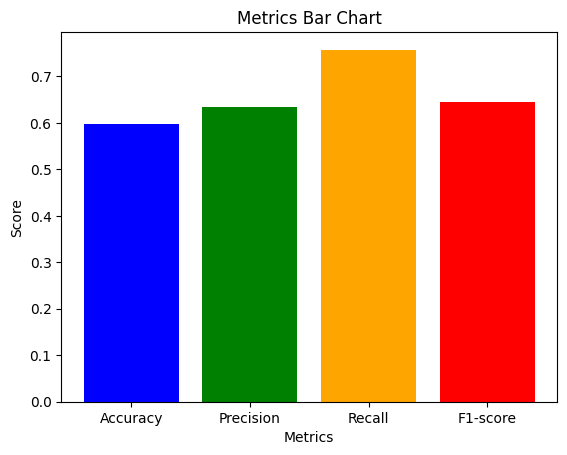

In [38]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

predicted_probs = model.predict(train_generator)
predicted_labels = (predicted_probs > 0.1).astype(int).flatten()

true_labels = train_generator.classes
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]
print(metrics)
print(values)
colors = ['blue', 'green', 'orange', 'red']

# Plot the bar chart
plt.bar(metrics, values, color=colors)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Metrics Bar Chart')
plt.show()

Found 263 images belonging to 2 classes.


9/9 [==============================] - 2s 244ms/step
['Accuracy', 'Precision', 'Recall', 'F1-score']
[0.7019011406844107, 0.5785714285714285, 0.7463917525773196, 0.6472573839662447]


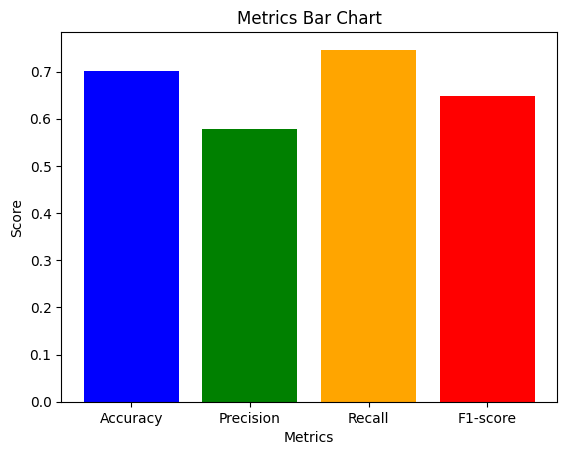

In [39]:
# Load and preprocess the test dataset
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

predicted_probs = model.predict(test_generator)
predicted_labels = (predicted_probs > 0.1).astype(int).flatten()

true_labels = test_generator.classes
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]
print(metrics)
print(values)
colors = ['blue', 'green', 'orange', 'red']

# Plot the bar chart
plt.bar(metrics, values, color=colors)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Metrics Bar Chart')
plt.show()